# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** [Fadlila Agustina]
- **Email:** [21083010050@student.upnjatim.ac.id]
- **ID Dicoding:** [M296D4KX2705]

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1: Bagaimana tren peminjaman sepeda berubah berdasarkan musim (springer, summer, fall, winter) selama dua tahun (2011 dan 2012)?
- Pertanyaan 2: Bagaimana perilaku peminjaman sepeda berubah saat terjadi perubahan mendadak dalam keadaan cuaca, dan apakah pengguna sepeda lebih memilih bersepeda pada cuaca ekstrem atau sebaliknya?
- Pertanyaan 3: Bagaimana distribusi peminjaman sepeda berdasarkan hari kerja dan libur selama dua tahun terakhir?

## Import Semua Packages/Library yang Digunakan

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [53]:
df_day = pd.read_csv("day.csv")
df_hour = pd.read_csv("hour.csv")

In [54]:
df_day

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [55]:
df_hour

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


### Assessing Data

### **df_day**

In [56]:
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [57]:
print("Total data duplikat pada dataset day:", df_day.duplicated().sum())

Total data duplikat pada dataset day: 0


In [58]:
# Mendeteksi missing value
missing_values = df_day.isnull()

# Menghitung jumlah missing value per kolom
missing_count = missing_values.sum()

# Menampilkan jumlah missing value per kolom
print("Jumlah Missing Value per Kolom:")
print(missing_count)

Jumlah Missing Value per Kolom:
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [59]:
# Mendeteksi dan menghitung jumlah outlier pada semua kolom numerik di df_day
def detect_outliers(df):
    outliers_count = {}

    for column in df.select_dtypes(include=np.number).columns:
        # Menghitung IQR (Interquartile Range)
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1

        # Mendeteksi outlier
        outliers = ((df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR)))

        # Menghitung jumlah outlier
        outliers_count[column] = outliers.sum()

    return outliers_count

# Menggunakan fungsi pada df_day
outliers_count_df_day = detect_outliers(df_day)

# Menampilkan jumlah outlier untuk setiap kolom numerik di df_day
print("Jumlah Outlier pada Setiap Kolom Numerik di df_day:")
print(outliers_count_df_day)

Jumlah Outlier pada Setiap Kolom Numerik di df_day:
{'instant': 0, 'season': 0, 'yr': 0, 'mnth': 0, 'holiday': 21, 'weekday': 0, 'workingday': 0, 'weathersit': 0, 'temp': 0, 'atemp': 0, 'hum': 2, 'windspeed': 13, 'casual': 44, 'registered': 0, 'cnt': 0}


In [60]:
df_day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


### **df_hour**

In [61]:
df_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [62]:
print("Total data duplikat pada dataset day:", df_hour.duplicated().sum())

Total data duplikat pada dataset day: 0


In [63]:
# Mendeteksi missing value
missing_values = df_hour.isnull()

# Menghitung jumlah missing value per kolom
missing_count = missing_values.sum()

# Menampilkan jumlah missing value per kolom
print("Jumlah Missing Value per Kolom:")
print(missing_count)

Jumlah Missing Value per Kolom:
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [64]:
# Mendeteksi dan menghitung jumlah outlier pada semua kolom numerik di df_hour
def detect_outliers(df):
    outliers_count = {}

    for column in df.select_dtypes(include=np.number).columns:
        # Menghitung IQR (Interquartile Range)
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1

        # Mendeteksi outlier
        outliers = ((df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR)))

        # Menghitung jumlah outlier
        outliers_count[column] = outliers.sum()

    return outliers_count

# Menggunakan fungsi pada df_day
outliers_count_df_hour = detect_outliers(df_hour)

# Menampilkan jumlah outlier untuk setiap kolom numerik di df_hour
print("Jumlah Outlier pada Setiap Kolom Numerik di df_hour:")
print(outliers_count_df_hour)

Jumlah Outlier pada Setiap Kolom Numerik di df_hour:
{'instant': 0, 'season': 0, 'yr': 0, 'mnth': 0, 'hr': 0, 'holiday': 500, 'weekday': 0, 'workingday': 0, 'weathersit': 3, 'temp': 0, 'atemp': 0, 'hum': 22, 'windspeed': 342, 'casual': 1192, 'registered': 680, 'cnt': 505}


In [65]:
df_hour.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data

### **df_day**

In [66]:
# Mapping nama-nama kolom yang akan diganti
nama_kolom_mapping = {
    "dteday": "date",
    "yr": "year",
    "mnth": "month",
    "weathersit": "weather_condition",
    "hum": "humidity",
    "casual": "unregistered",
    "cnt": "count"
}

# Mengganti nama kolom
df_day.rename(columns=nama_kolom_mapping, inplace=True)

# Menampilkan dataset setelah nama kolom diganti
print(df_day.head())

   instant        date  season  year  month  holiday  weekday  workingday  \
0        1  2011-01-01       1     0      1        0        6           0   
1        2  2011-01-02       1     0      1        0        0           0   
2        3  2011-01-03       1     0      1        0        1           1   
3        4  2011-01-04       1     0      1        0        2           1   
4        5  2011-01-05       1     0      1        0        3           1   

   weather_condition      temp     atemp  humidity  windspeed  unregistered  \
0                  2  0.344167  0.363625  0.805833   0.160446           331   
1                  2  0.363478  0.353739  0.696087   0.248539           131   
2                  1  0.196364  0.189405  0.437273   0.248309           120   
3                  1  0.200000  0.212122  0.590435   0.160296           108   
4                  1  0.226957  0.229270  0.436957   0.186900            82   

   registered  count  
0         654    985  
1         670   

In [67]:
# Mengganti nilai 2011 dengan 0 dan nilai 2012 dengan 1 pada kolom 'year'
df_day['year'].replace({2011: 0, 2012: 1}, inplace=True)

# Mengganti nilai 'springer' dengan 1, 'summer' dengan 2, 'fall' dengan 3, dan 'winter' dengan 4 pada kolom 'season'
df_day['season'].replace({'springer': 1, 'summer': 2, 'fall': 3, 'winter': 4}, inplace=True)

# Mengganti nilai 'Clear' dengan 1, 'Mist' dengan 2, 'Light Rain/Snow' dengan 3, dan 'Heavy Rain/Snow' dengan 4 pada kolom 'weather_condition'
df_day['weather_condition'].replace({'Clear': 1, 'Mist': 2, 'Light Rain/Snow': 3, 'Heavy Rain/Snow': 4}, inplace=True)

# Menampilkan dataframe setelah perubahan nilai
print(df_day.head())

   instant        date  season  year  month  holiday  weekday  workingday  \
0        1  2011-01-01       1     0      1        0        6           0   
1        2  2011-01-02       1     0      1        0        0           0   
2        3  2011-01-03       1     0      1        0        1           1   
3        4  2011-01-04       1     0      1        0        2           1   
4        5  2011-01-05       1     0      1        0        3           1   

   weather_condition      temp     atemp  humidity  windspeed  unregistered  \
0                  2  0.344167  0.363625  0.805833   0.160446           331   
1                  2  0.363478  0.353739  0.696087   0.248539           131   
2                  1  0.196364  0.189405  0.437273   0.248309           120   
3                  1  0.200000  0.212122  0.590435   0.160296           108   
4                  1  0.226957  0.229270  0.436957   0.186900            82   

   registered  count  
0         654    985  
1         670   

In [68]:
# kolom-kolom yang akan diubah tipe datanya menjadi kategori
selected_columns = ['season', 'year', 'month', 'holiday', 'weekday', 'workingday', 'weather_condition']

# Melakukan perulangan untuk setiap kolom dalam daftar
for col in selected_columns:
    # Mengubah tipe data kolom menjadi kategori
    df_day[col] = df_day[col].astype('category')
    # Menambahkan pesan untuk memberi penjelasan bahwa tipe data kolom telah diubah
    print(f"Tipe data kolom {col} telah diubah menjadi tipe data kategori.")

Tipe data kolom season telah diubah menjadi tipe data kategori.
Tipe data kolom year telah diubah menjadi tipe data kategori.
Tipe data kolom month telah diubah menjadi tipe data kategori.
Tipe data kolom holiday telah diubah menjadi tipe data kategori.
Tipe data kolom weekday telah diubah menjadi tipe data kategori.
Tipe data kolom workingday telah diubah menjadi tipe data kategori.
Tipe data kolom weather_condition telah diubah menjadi tipe data kategori.


### **df_hour**

In [69]:
# Mapping nama-nama kolom yang akan diganti
nama_kolom_mapping = {
    "dteday": "date",
    "yr": "year",
    "hr":"hour",
    "weathersit": "weather_condition",
    "hum": "humidity",
    "casual": "unregistered",
    "cnt": "count"
}

# Mengganti nama kolom
df_hour.rename(columns=nama_kolom_mapping, inplace=True)

# Menampilkan dataset setelah nama kolom diganti
print(df_day.head())

   instant        date season year month holiday weekday workingday  \
0        1  2011-01-01      1    0     1       0       6          0   
1        2  2011-01-02      1    0     1       0       0          0   
2        3  2011-01-03      1    0     1       0       1          1   
3        4  2011-01-04      1    0     1       0       2          1   
4        5  2011-01-05      1    0     1       0       3          1   

  weather_condition      temp     atemp  humidity  windspeed  unregistered  \
0                 2  0.344167  0.363625  0.805833   0.160446           331   
1                 2  0.363478  0.353739  0.696087   0.248539           131   
2                 1  0.196364  0.189405  0.437273   0.248309           120   
3                 1  0.200000  0.212122  0.590435   0.160296           108   
4                 1  0.226957  0.229270  0.436957   0.186900            82   

   registered  count  
0         654    985  
1         670    801  
2        1229   1349  
3        145

In [70]:
# Daftar kolom yang akan diubah nilai pada dataframe df_hour
columns_to_replace = ['year', 'season', 'weather_condition']

# Mengganti nilai 0 dengan 2011 dan nilai 1 dengan 2012 pada kolom 'year'
df_hour['year'].replace({0: 2011, 1: 2012}, inplace=True)

# Mengganti nilai 1 dengan 'springer', 2 dengan 'summer', 3 dengan 'fall', dan 4 dengan 'winter' pada kolom 'season'
df_hour['season'].replace({1: 'springer', 2: 'summer', 3: 'fall', 4: 'winter'}, inplace=True)

# Mengganti nilai 1 dengan 'Clear', 2 dengan 'Mist', 3 dengan 'Light Rain/Snow', dan 4 dengan 'Heavy Rain/Snow' pada kolom 'weather_condition'
df_hour['weather_condition'].replace({1: 'Clear', 2: 'Mist', 3: 'Light Rain/Snow', 4: 'Heavy Rain/Snow'}, inplace=True)

In [71]:
# Daftar kolom untuk pengubahan tipe data menjadi kategori
selected_columns = ['season', 'year', 'holiday', 'weekday', 'workingday', 'weather_condition']

# Mengubah tipe data kolom menjadi kategori dengan perulangan
for selected_col in selected_columns:
    # Mengubah tipe data kolom menjadi kategori
    df_hour[selected_col] = df_hour[selected_col].astype('category')
    # Menampilkan pesan bahwa tipe data kolom telah diubah
    print(f"Kolom {selected_col} berhasil diubah menjadi tipe data kategori.")

Kolom season berhasil diubah menjadi tipe data kategori.
Kolom year berhasil diubah menjadi tipe data kategori.
Kolom holiday berhasil diubah menjadi tipe data kategori.
Kolom weekday berhasil diubah menjadi tipe data kategori.
Kolom workingday berhasil diubah menjadi tipe data kategori.
Kolom weather_condition berhasil diubah menjadi tipe data kategori.


In [72]:
# Mengubah kolom 'date' menjadi tipe data datetime pada df_day
df_day['date'] = pd.to_datetime(df_day['date'])
# Menambahkan pesan bahwa kolom 'date' telah diubah menjadi tipe data datetime
print("Kolom 'date' pada df_day telah diubah menjadi tipe data datetime.")

# Mengubah kolom 'date' menjadi tipe data datetime pada df_hour
df_hour['date'] = pd.to_datetime(df_hour['date'])
# Menambahkan pesan bahwa kolom 'date' telah diubah menjadi tipe data datetime
print("Kolom 'date' pada hours_df telah diubah menjadi tipe data datetime.")

Kolom 'date' pada df_day telah diubah menjadi tipe data datetime.
Kolom 'date' pada hours_df telah diubah menjadi tipe data datetime.


In [73]:
# Menampilkan informasi untuk kolom 'date' setelah diubah tipe datanya di df_day
print("Informasi setelah perubahan tipe data kolom 'date' pada df_day:\n")
df_day["date"].info()

Informasi setelah perubahan tipe data kolom 'date' pada df_day:

<class 'pandas.core.series.Series'>
RangeIndex: 731 entries, 0 to 730
Series name: date
Non-Null Count  Dtype         
--------------  -----         
731 non-null    datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 5.8 KB


In [74]:
# Menampilkan informasi untuk kolom 'date' setelah diubah tipe datanya di df_hour
print("Informasi setelah perubahan tipe data kolom 'date' pada df_hour:\n")
df_hour["date"].info()

Informasi setelah perubahan tipe data kolom 'date' pada df_hour:

<class 'pandas.core.series.Series'>
RangeIndex: 17379 entries, 0 to 17378
Series name: date
Non-Null Count  Dtype         
--------------  -----         
17379 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 135.9 KB


## Exploratory Data Analysis (EDA)

### Explore df_day

In [75]:
# Mengelompokkan berdasarkan tahun dan menghitung jumlah total
yearly_summary = df_day.groupby(by="year").agg({
    "count": "sum",
    "unregistered": "sum",
    "registered": "sum"
})
yearly_summary

,count,unregistered,registered
year,,,
0,1243103,247252,995851
1,2049576,372765,1676811


0 menunjukkan tahun 2011 dan 1 menunjukkan tahun 2012

In [76]:
# Mengelompokkan berdasarkan musim dan menghitung jumlah total, kemudian diurutkan
seasonal_summary = df_day.groupby(by="season").agg({
    "count": "sum",
    "unregistered": "sum",
    "registered": "sum"
}).sort_values(by="count", ascending=False)
seasonal_summary

,count,unregistered,registered
season,,,
3,1061129,226091,835038
2,918589,203522,715067
4,841613,129782,711831
1,471348,60622,410726




*   season 1 = musim springer
*   season 2 = musim summer
*   season 3 = musim fall
*   season 4 = winter





In [77]:
# Mengelompokkan berdasarkan kondisi cuaca dan menghitung jumlah total, kemudian diurutkan
weather_summary = df_day.groupby(by="weather_condition").agg({
    "count": "sum",
    "unregistered": "sum",
    "registered": "sum"
}).sort_values(by="count", ascending=False)
weather_summary

,count,unregistered,registered
weather_condition,,,
1,2257952,446346,1811606
2,996858,169776,827082
3,37869,3895,33974


*   weather_condition 1 = cuaca clear
*   weather_condition 2 = cuaca mist
*   weather_condition 3 = cuaca light rain/snow

In [78]:
# Mengelompokkan berdasarkan hari dan menghitung jumlah total, kemudian diurutkan
weekday_summary = df_day.groupby(by="weekday").agg({
    "count": "sum",
    "unregistered": "sum",
    "registered": "sum"
}).sort_values(by="count", ascending=False)
weekday_summary

,count,unregistered,registered
weekday,,,
5,487790,78238,409552
4,485395,61460,423935
6,477807,153852,323955
3,473048,57319,415729
2,469109,57843,411266
1,455503,70784,384719
0,444027,140521,303506


In [79]:
# Mengelompokkan berdasarkan hari kerja dan menghitung jumlah total, kemudian diurutkan
workingday_summary = df_day.groupby(by="workingday").agg({
    "unregistered": "sum",
    "registered": "sum",
    "count": "sum"
}).sort_values(by="count", ascending=False)
workingday_summary

,unregistered,registered,count
workingday,,,
1,303285,1989125,2292410
0,316732,683537,1000269


In [80]:
# Mengelompokkan berdasarkan hari libur dan menghitung jumlah total, kemudian diurutkan
holiday_summary = df_day.groupby(by="holiday").agg({
    "unregistered": "sum",
    "registered": "sum",
    "count": "sum"
}).sort_values(by="count", ascending=False)
holiday_summary

,unregistered,registered,count
holiday,,,
0,597658,2616586,3214244
1,22359,56076,78435


### Explore df_hour

In [81]:
# Menyusun ringkasan berdasarkan kondisi cuaca pada df_hour
weather_summary_hours = df_hour.groupby(by="weather_condition").agg({
    "unregistered": "sum",
    "registered": "sum",
    "count": "sum"
}).sort_values(by="count", ascending=False)
weather_summary_hours

,unregistered,registered,count
weather_condition,,,
Clear,462745,1875428,2338173
Mist,134481,661471,795952
Light Rain/Snow,22783,135548,158331
Heavy Rain/Snow,8,215,223


In [82]:
# Menyusun ringkasan berdasarkan waktu penyewaan pada df_hour
rental_duration_summary_hours = df_hour.groupby(by="hour").agg({
    "unregistered": "sum",
    "registered": "sum",
    "count": "sum"
}).sort_values(by="count", ascending=False)
rental_duration_summary_hours

,unregistered,registered,count
hour,,,
17,54220,282640,336860
18,44496,265276,309772
8,15761,245240,261001
16,53834,173914,227748
19,35505,191284,226789
13,52713,132206,184919
12,49718,134696,184414
15,54606,128543,183149
14,55089,120563,175652


Membuat heatmap untuk melihat korelasi antarkolom pada df_day dan df_hour

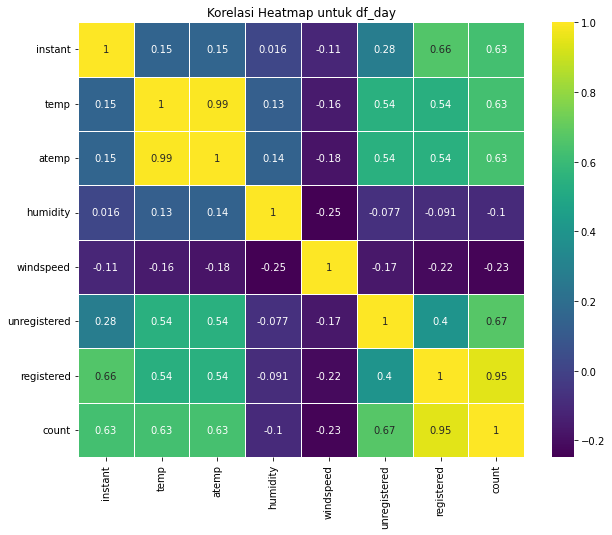

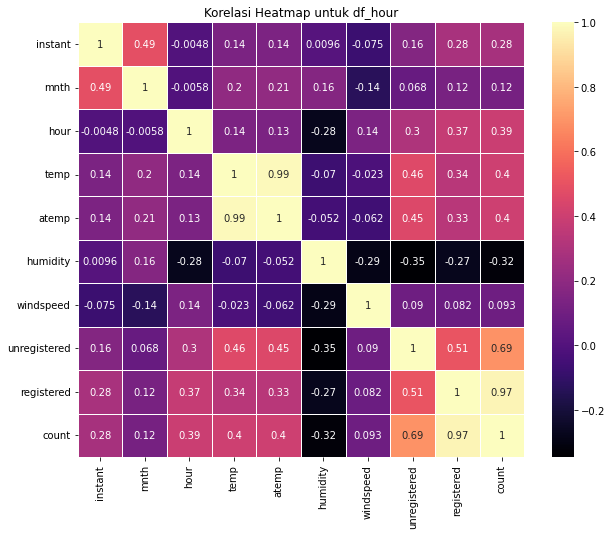

In [83]:
# Membuat matriks korelasi dan heatmap untuk df_day
correlation_matrix_days = df_day.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(data=correlation_matrix_days, annot=True, cmap='viridis', linewidths=.5)
plt.title("Korelasi Heatmap untuk df_day")
plt.show()

# Membuat matriks korelasi dan heatmap untuk df_hour
correlation_matrix_hours = df_hour.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(data=correlation_matrix_hours, annot=True, cmap='magma', linewidths=.5)
plt.title("Korelasi Heatmap untuk df_hour")
plt.show()

Dapat dilihat dari kedua heatmap di atas, bahwa hubungan antarkolom yang bernilai 1 (positif) mempunyai hubungan korelasi yang kuat, dan hubungan antarkolom yang bernilai - (negatif) mempunyai hubungan korelasi yang lemah.

In [84]:
# Menggabungkan dua dataset berdasarkan tanggal
all_df = pd.merge(
    left=df_hour,
    right=df_day,
    how="left",
    left_on="date",
    right_on="date"
)
all_df

,instant_x,date,season_x,year_x,mnth,hour,holiday_x,weekday_x,workingday_x,weather_condition_x,...,weekday_y,workingday_y,weather_condition_y,temp_y,atemp_y,humidity_y,windspeed_y,unregistered_y,registered_y,count_y
0,1,2011-01-01,springer,2011,1,0,0,6,0,Clear,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-01,springer,2011,1,1,0,6,0,Clear,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
2,3,2011-01-01,springer,2011,1,2,0,6,0,Clear,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
3,4,2011-01-01,springer,2011,1,3,0,6,0,Clear,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
4,5,2011-01-01,springer,2011,1,4,0,6,0,Clear,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,springer,2012,12,19,0,1,1,Mist,...,1,1,2,0.215833,0.223487,0.577500,0.154846,439,2290,2729
17375,17376,2012-12-31,springer,2012,12,20,0,1,1,Mist,...,1,1,2,0.215833,0.223487,0.577500,0.154846,439,2290,2729
17376,17377,2012-12-31,springer,2012,12,21,0,1,1,Clear,...,1,1,2,0.215833,0.223487,0.577500,0.154846,439,2290,2729
17377,17378,2012-12-31,springer,2012,12,22,0,1,1,Clear,...,1,1,2,0.215833,0.223487,0.577500,0.154846,439,2290,2729


Kolom yang terdapat _x merupakan kolom dari df_day dan kolom yang terdapat _y kolom dari f_hour

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana tren peminjaman sepeda berubah berdasarkan musim (springer, summer, fall, winter) selama dua tahun (2011 dan 2012)?

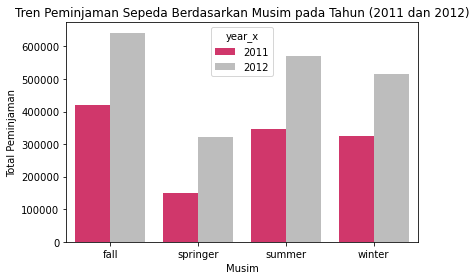

In [85]:
# Menggunakan data dari dataset yang digabung (all_df)
custom_color_list = ['#e91e63', '#bdbdbd', '#bdbdbd', '#bdbdbd']  # Warna pink dan abu

# Mengelompokkan data berdasarkan musim dan tahun, kemudian menghitung total peminjaman
custom_seasonal_trend = all_df.groupby(['year_x', 'season_x'])['count_x'].sum().reset_index()

# Membuat barplot dengan warna yang diubah
sns.barplot(data=custom_seasonal_trend, x='season_x', y='count_x', hue='year_x', palette=custom_color_list)

plt.title("Tren Peminjaman Sepeda Berdasarkan Musim pada Tahun (2011 dan 2012)")
plt.xlabel('Musim')
plt.ylabel('Total Peminjaman')

plt.tight_layout()
plt.show()

### Pertanyaan 2: Bagaimana perilaku peminjaman sepeda berubah saat terjadi perubahan mendadak dalam keadaan cuaca, dan apakah pengguna sepeda lebih memilih bersepeda pada cuaca ekstrem atau sebaliknya?

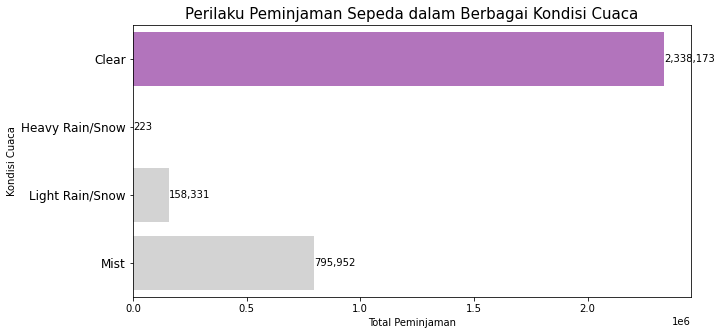

In [86]:
# Mengelompokkan data berdasarkan kondisi cuaca dan menghitung total peminjaman
weather_effect_df = all_df.groupby('weather_condition_x')['count_x'].sum().reset_index()

# Mengganti data weather_condition dengan kondisi yang lebih deskriptif
weather_effect_df.replace({
    'weather_condition_x': {
        1: 'Cerah',
        2: 'Kabut',
        3: 'Hujan Ringan, Salju Ringan',
        4: 'Hujan Lebat, Salju, Kabut'
    }
}, inplace=True)

# Mengurutkan data berdasarkan total peminjaman dengan urutan menurun
weather_effect_df = weather_effect_df.sort_values('count_x', ascending=False)

# Mendefinisikan palet warna
custom_color_palette = ['#BA68C8', '#D3D3D3', '#D3D3D3', '#D3D3D3']  # Ungu dan light grey

# Membuat barplot dengan tampilan jumlah peminjaman
plt.figure(figsize=(10, 5))
ax = sns.barplot(
    x='count_x',
    y='weather_condition_x',
    data=weather_effect_df,
    palette=custom_color_palette
)
plt.title("Perilaku Peminjaman Sepeda dalam Berbagai Kondisi Cuaca", loc="center", fontsize=15)
plt.ylabel("Kondisi Cuaca")
plt.xlabel("Total Peminjaman")

# Menambahkan data label
for p in ax.patches:
    width = p.get_width()
    plt.text(width, p.get_y() + p.get_height() / 2, f"{width:,.0f}", ha='left', va='center', color='black')

plt.tick_params(axis='y', labelsize=12)
plt.show()

### Pertanyaan 3: Bagaimana distribusi peminjaman sepeda berdasarkan hari kerja dan libur selama dua tahun terakhir?

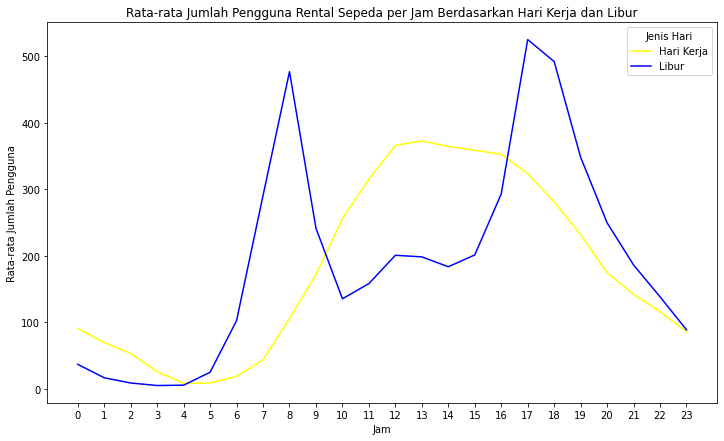

In [87]:
# Mengelompokkan data
grouped_hour_custom = all_df.groupby(['workingday_x', 'hour'])['count_x'].mean().reset_index(name='average_counts')

# Plotting dengan warna yang diubah
fig, ax = plt.subplots(figsize=(12, 7))

# Loop melalui nilai workingday yang unik
for workingday, group in grouped_hour_custom.groupby('workingday_x'):
    ax.plot(group['hour'], group['average_counts'], label=f'Jenis Hari: {"Hari Kerja" if workingday else "Akhir Pekan"}', color=('blue' if workingday else 'yellow'))

# Atur properti plot
ax.set_xlabel('Jam')
ax.set_ylabel('Rata-rata Jumlah Pengguna')
ax.set_title('Rata-rata Jumlah Pengguna Rental Sepeda per Jam Berdasarkan Hari Kerja dan Libur')

# Tampilkan legenda
plt.legend(title='Jenis Hari', loc='upper right', labels=['Hari Kerja', 'Libur'])

# Tampilkan plot
plt.xticks(list(range(24)))  # Menambahkan label jam di sumbu x
plt.show()

## Conclusion

**- Conclusion pertanyaan 1** :

Dari visualisasi barplot, terlihat bahwa terjadi peningkatan jumlah peminjaman sepeda pada tahun 2012, terutama pada musim fall. Peminjaman sepeda pada musim gugur tahun 2012 mencapai puncaknya dibandingkan dengan musim lainnya pada tahun yang sama, serta dibandingkan dengan musim-musim pada tahun 2011. Warna pink dan abu yang digunakan dalam visualisasi memberikan kontrast yang jelas antara tahun 2011 dan 2012. Kesimpulan ini memberikan informasi berharga untuk pengambilan keputusan terkait manajemen sepeda dan layanan pada musim tertentu.

**- Conclusion pertanyaan 2**
Dari hasil visualisasi barplot di atas, dapat disimpulkan bahwa perilaku peminjaman sepeda berubah berdasarkan kondisi cuaca. Kondisi cuaca yang berpengaruh signifikan terhadap perilaku peminjaman sepeda tertinggi adalah cuaca clear (cerah) dengan jumlah peminjam mencapai 2.338.173, sedangkan kondisi cuaca yang paling rendah adalah Heavy Rain/Snow (Hujan Lebat, Salju, Kabut). Perbedaan jumlah peminjaman antara kondisi cuaca yang berbeda menunjukkan adanya pola perilaku pengguna sepeda dalam merespon kondisi cuaca tertentu. Hal ini dapat menjadi informasi berharga bagi penyedia layanan sepeda dalam mengoptimalkan strategi pelayanan dan pengelolaan sepeda berdasarkan prakiraan cuaca.

**- Conclusion pertanyaan 3**
Dari visualisasi rata-rata jumlah pengguna rental sepeda per jam berdasarkan hari kerja dan libur, dapat disimpulkan bahwa terdapat perbedaan pola penggunaan sepeda antara hari kerja dan libur. Pada hari libur, puncak penggunaan sepeda terjadi pada jam 8 pagi dan 5 sore. Sementara itu, pada hari kerja, rata-rata jumlah pengguna terbanyak justru terjadi pada jam 1 siang. Hal ini menunjukkan bahwa kebiasaan penggunaan sepeda cenderung bervariasi tergantung pada jenis hari, dan pemahaman ini dapat menjadi landasan bagi penyelenggara layanan sepeda untuk mengoptimalkan penempatan dan ketersediaan sepeda sesuai dengan pola penggunaan yang berbeda di berbagai waktu.

***Analisis Lanjutan RFM***

In [88]:
from datetime import datetime

# Calculate Recency, Frequency, and Monetary values
current_date = datetime.now()
all_df['recency'] = (current_date - all_df['date']).dt.days
all_df['frequency'] = all_df['count_x'] + all_df['count_y']
all_df['monetary'] = all_df['count_x'] * all_df['registered_x'] + all_df['count_y'] * all_df['registered_y']

# Define quartiles
recency_quartile = pd.qcut(all_df['recency'], q=4, labels=False)
frequency_quartile = pd.qcut(all_df['frequency'], q=4, labels=False)
monetary_quartile = pd.qcut(all_df['monetary'], q=4, labels=False)

# Assign RFM scores to DataFrame
all_df['R'] = recency_quartile + 1  # Add 1 to start scores from 1
all_df['F'] = frequency_quartile + 1
all_df['M'] = monetary_quartile + 1

# Combine RFM scores into one column
all_df['RFM_Score'] = all_df['R'].astype(str) + all_df['F'].astype(str) + all_df['M'].astype(str)

# Display DataFrame with RFM scores
print(all_df[['date', 'recency', 'frequency', 'monetary', 'R', 'F', 'M', 'RFM_Score']])

            date  recency  frequency  monetary  R  F  M RFM_Score
0     2011-01-01     4811       1001    644398  4  1  1       411
1     2011-01-01     4811       1025    645470  4  1  1       411
2     2011-01-01     4811       1017    645054  4  1  1       411
3     2011-01-01     4811        998    644320  4  1  1       411
4     2011-01-01     4811        986    644191  4  1  1       411
...          ...      ...        ...       ... .. .. ..       ...
17374 2012-12-31     4081       2848   6262262  1  1  1       111
17375 2012-12-31     4081       2818   6256619  1  1  1       111
17376 2012-12-31     4081       2819   6256880  1  1  1       111
17377 2012-12-31     4081       2790   6252338  1  1  1       111
17378 2012-12-31     4081       2778   6251223  1  1  1       111

[17379 rows x 8 columns]


Dalam analisis RFM (Recency, Frequency, Monetary), menghitung skor untuk setiap dimensi berdasarkan quartile. Dari hasil tersebut, dapat dilihat bahwa setiap entitas dalam dataset memiliki nilai skor Recency (R), Frequency (F), dan Monetary (M) yang menggambarkan perilaku peminjaman sepeda mereka. Skor RFM kemudian digabungkan menjadi satu kolom 'RFM_Score'. Analisis ini membantu untuk memahami sejauh mana entitas tersebut berkontribusi dalam hal ketertarikan, frekuensi, dan nilai moneter dalam rentang waktu tertentu, memberikan gambaran yang lebih komprehensif tentang profil pelanggan.

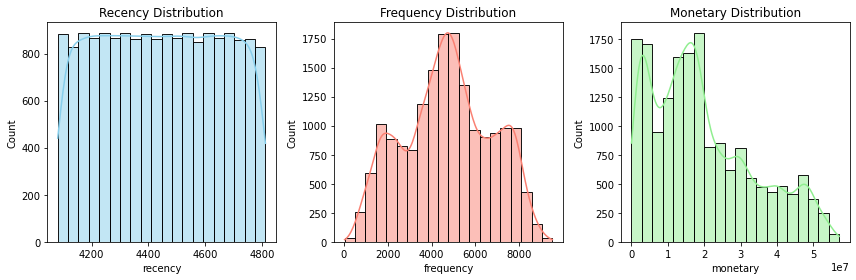

In [89]:
# Visualisasi Recency
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
sns.histplot(all_df['recency'], bins=20, kde=True, color='skyblue')
plt.title('Recency Distribution')

# Visualisasi Frequency
plt.subplot(1, 3, 2)
sns.histplot(all_df['frequency'], bins=20, kde=True, color='salmon')
plt.title('Frequency Distribution')

# Visualisasi Monetary
plt.subplot(1, 3, 3)
sns.histplot(all_df['monetary'], bins=20, kde=True, color='lightgreen')
plt.title('Monetary Distribution')

plt.tight_layout()
plt.show()

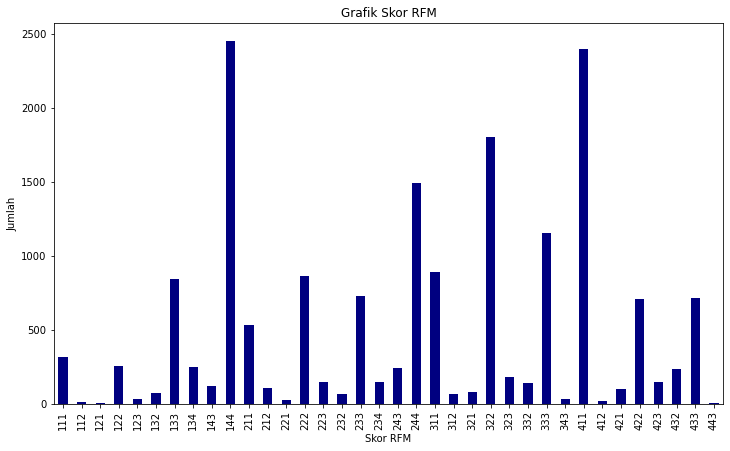

In [90]:
# Visualisasi Skor RFM
plt.figure(figsize=(12, 7))

# Bar plot untuk distribusi RFM Score
all_df['RFM_Score'].value_counts().sort_index().plot(kind='bar', color='navy')

# Menambahkan judul dan label
plt.title('Grafik Skor RFM')
plt.xlabel('Skor RFM')
plt.ylabel('Jumlah')

plt.show()

Visualisasi ini memberikan gambaran bahwa mayoritas pelanggan memiliki skor RFM yang cenderung rendah, mengindikasikan tingkat aktivitas dan nilai yang lebih rendah. Analisis ini dapat menjadi landasan untuk pengembangan strategi pemasaran yang lebih efektif dan upaya peningkatan retensi pelanggan untuk meningkatkan nilai bisnis.

In [92]:
# Assuming all_df is your DataFrame
# Save DataFrame to CSV file
all_df.to_csv("all_df.csv", index=False)